# Programa 6

## Integrantes:
- Silva Velázquez Elsy Camila
- Longines Tapia Hugo Didier
- Andrés Urbano Guillermo Gerardo


# Implementar el algoritmo de k-medias desde cero

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

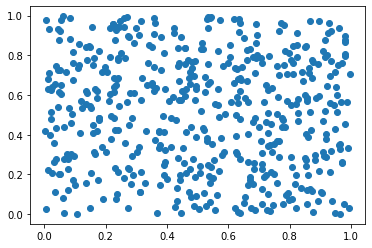

In [ ]:
# Vectores de prueba
X = np.random.rand(500, 2)
plt.scatter(X[:,0], X[:,1])

In [ ]:
import random

class Kmean():

    def __init__(self,n_cluster):
        """Inicializa los numeros de clusters.
        """
        self.n_cluster = n_cluster        
        pass

    def fit(self, X):
        """Aplica el algoritmo k-medias"""
        colores = np.zeros((X.shape[0], 1))        
        # Afina todos los colores posibles
        for i in range(self.n_cluster):
            colores[i] = i     

        for i, xi in enumerate(X):
            if i >= self.n_cluster:
                color = random.randint(0, self.n_cluster-1)                                    
                colores[i] = color                                    
        matriz_c = np.concatenate((X, colores), axis=1)
        flag = True
        while(flag):            
            #print('Antes')
            #print(matriz_c)
            # Agruparlas
            centroides = []
            for j in range(self.n_cluster):
                clusters = matriz_c[matriz_c[:,-1] == j]           
                centr = self.centroide(clusters)            
                centroides.append(centr)            
            
            matriz_distancias = np.zeros((X.shape[0], self.n_cluster))
            for i, centroide in enumerate(centroides):
                for j, xi in enumerate(X):
                    distancia = self.dist_euclides(centroide, xi)
                    matriz_distancias[j][i] = distancia
            
            # Encontrar el centroide minimo y asignarme un color al dato
            for i, distancias in enumerate(matriz_distancias):
                dis_min = np.min(distancias)
                grupo_pertenece = np.where(distancias == dis_min)[0][0]  
                colores[i] = grupo_pertenece                
                
            new_matriz_c = np.concatenate((X, colores), axis=1)
            #print('Despues')
            #print(new_matriz_c)
            if (matriz_c == new_matriz_c).all():
                flag = False
            else:
                matriz_c = new_matriz_c               
        return new_matriz_c, centroides

    def centroide(self, C):
        """Calcula el centroide"""
        suma = np.zeros((C.shape[1]))        
        for row in C:            
            suma = suma + row
        suma = suma / C.shape[0]
        return suma[0:-1]    
      
    def dist_euclides(self,P,Q):
        """Calcula la distancia euclideana"""
        return np.sqrt(np.sum((P-Q)**2))

In [ ]:
km = Kmean(n_cluster=5)
km, C = km.fit(X)
C = np.array(C)

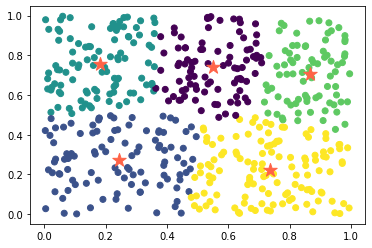

In [ ]:
fig, ax = plt.subplots()
ax.scatter(km[:,0], km[:,1], c=km[:,2])
ax.scatter(C[:,0], C[:,1], marker='*', s=200, c='tomato')


# Distancia Manhattan
Modifica los ejemplos realizados en clase utilizando la distancia Manhattan y compara los resultados.

In [ ]:
import random

class Kmean():

    def __init__(self,n_cluster):
        """Inicializa los numeros de clusters"""
        self.n_cluster = n_cluster
        
        pass

    def fit(self, X, method=None):
        """Aplica el algoritmo k-medias"""
        colores = np.zeros((X.shape[0], 1))        
        # Afina todos los colores posibles
        for i in range(self.n_cluster):
            colores[i] = i     

        for i, xi in enumerate(X):
            if i >= self.n_cluster:
                color = random.randint(0, self.n_cluster-1)                                    
                colores[i] = color                                    
        matriz_c = np.concatenate((X, colores), axis=1)
        flag = True
        while(flag):            
            #print('Antes')
            #print(matriz_c)
            # Agruparlas
            centroides = []
            for j in range(self.n_cluster):
                clusters = matriz_c[matriz_c[:,-1] == j]           
                centr = self.centroide(clusters)            
                centroides.append(centr)            
            
            matriz_distancias = np.zeros((X.shape[0], self.n_cluster))
            for i, centroide in enumerate(centroides):
                for j, xi in enumerate(X):
                    distancia = dist_euclides(centroide, xi)
                    matriz_distancias[j][i] = distancia
            
            # Encontrar el centroide minimo y asignarme un color al dato
            for i, distancias in enumerate(matriz_distancias):
                dis_min = np.min(distancias)
                grupo_pertenece = np.where(distancias == dis_min)[0][0]  
                colores[i] = grupo_pertenece                
                
            new_matriz_c = np.concatenate((X, colores), axis=1)
            #print('Despues')
            #print(new_matriz_c)
            if (matriz_c == new_matriz_c).all():
                flag = False
            else:
                matriz_c = new_matriz_c               
        return new_matriz_c, centroides

    def centroide(self, C):
        """Calcula el centroide"""
        suma = np.zeros((C.shape[1]))        
        for row in C:            
            suma = suma + row
        suma = suma / C.shape[0]
        return suma[0:-1]    

In [ ]:
def dist_manhattan(P,Q):
    """Calcula la distancia Manhathan"""
    return np.sum(np.abs((P-Q)))

    
def dist_euclides(P,Q):  
    """Calcula la distancia euclideana"""  
    return np.sqrt(np.sum((P-Q)**2))

km = Kmean(n_cluster=5)
km, C = km.fit(X, dist_manhattan)
C = np.array(C)

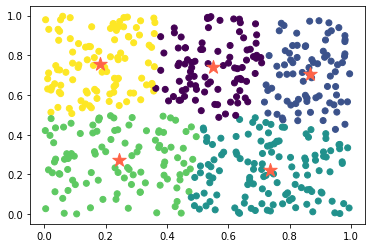

In [ ]:
fig, ax = plt.subplots()
ax.scatter(km[:,0], km[:,1], c=km[:,2])
ax.scatter(C[:,0], C[:,1], marker='*', s=200, c='tomato')
